# Regularied Linear Regression and Bias vs Variance

## 1 Import data set

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize

In [2]:
data = loadmat('ex5data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]),
 'y': array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]),
 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-

In [3]:
def getData(data, *args):
    return [data[i] for i in args]


In [4]:
X, y = data['X'], data['y']
X.shape, y.shape

((12, 1), (12, 1))

In [5]:
Xtest, ytest = data['X'], data['ytest']
Xtest.shape, ytest.shape

((12, 1), (21, 1))

In [6]:
Xval, yval = data['Xval'], data['yval']
Xval.shape, yval.shape

((21, 1), (21, 1))

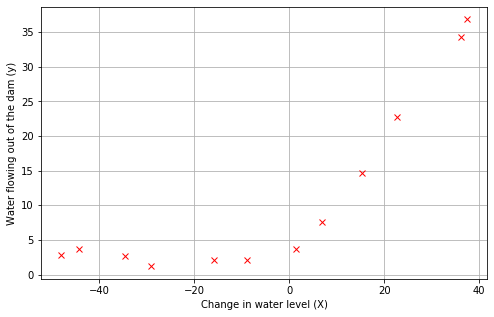

In [7]:
def plotData(X, y):
    plt.figure(figsize=(8, 5))
    plt.ylabel('Water flowing out of the dam (y)')
    plt.xlabel('Change in water level (X)')
    plt.plot(X, y, 'rx')
    plt.grid(True)
plotData(X, y)

In [8]:
X = np.insert(X, 0, 1, axis=1)
Xtest = np.insert(Xtest, 0, 1, axis=1)
Xval = np.insert(Xval, 0, 1, axis=1)


## 2 Regularized linear regression cost function

In [16]:
def h(theta, X):
    return X @ theta
def cost(theta, X, y, lam=0.):
    theta = theta.reshape((X.shape[1], 1))
    m = X.shape[0]
    a1 = h(theta, X)
    #print(a1.shape, y.shape)
    J = np.sum((a1 - y) ** 2) / (2 * m)
    #print(J)
    reg = lam * np.sum(theta[1:] * theta[1:]) / (2 * m)
    #print(reg)
    return J + reg
#theta = np.ones(2)
#cost(theta.reshape(2,1), X, y, 0.)

## 3 Gradient

In [10]:
def gradient(theta, X, y, lam=0.):
    theta = theta.reshape((theta.shape[0], 1))
    m = X.shape[0]
    grad = (X.T @ (h(theta, X) - y)) / m
    reg = float(lam) * theta / m
    reg[0] = 0.
    return (grad + reg).ravel()
#gradient(theta, X, y, 1.)

## 4 Training

In [11]:
def train(theta, X, y, lam=0.):
    fmin = minimize(cost, x0=theta, args=(X, y, lam),
                   method='TNC', jac=gradient, options={'disp':True})
    return fmin


In [12]:
theta1 = np.ones(2)
theta2 = np.random.rand(2)
lam = 0.2
fmin = train(theta2, X, y, lam)
print(fmin)
cost(fmin.x, X, y, lam)

(12, 1) (12, 1)
(12, 1) (12, 1)
(12, 1) (12, 1)
(12, 1) (12, 1)
(12, 1) (12, 1)
(12, 1) (12, 1)
(12, 1) (12, 1)
(12, 1) (12, 1)
     fun: 22.375033651965865
     jac: array([-8.34382385e-09, -8.48427274e-08])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 7
     nit: 3
  status: 0
 success: True
       x: array([13.08786563,  0.36777178])
(12, 1) (12, 1)


22.375033651965865

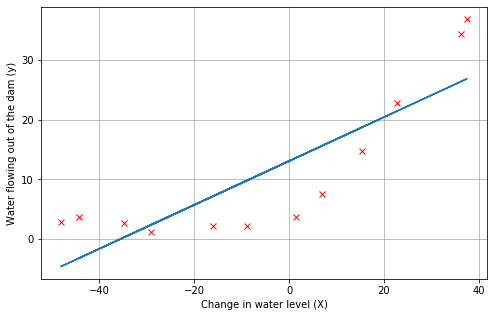

In [14]:
plotData(X[:,1], y)
plt.plot(X[:,1], h(fmin.x, X).ravel())

## 5 Learning curve

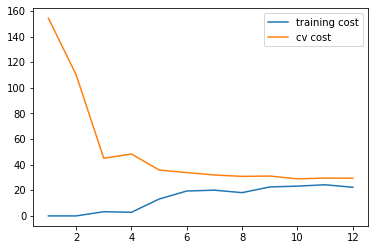

In [17]:
def plotLearningCureve(X, y, Xval, yval, lam=0.):
    tr_cost, cv_cost = [], []
    m = list(range(1, X.shape[0] + 1))
    theta = np.random.rand(X.shape[1])
    for i in m:
        fmin = train(theta, X[:i], y[:i], lam)
        tr_cost.append(cost(fmin.x, X[:i], y[:i], lam))
        cv_cost.append(cost(fmin.x, Xval, yval, lam))
    plt.plot(m, tr_cost, label='training cost')
    plt.plot(m, cv_cost, label='cv cost')
    plt.legend(loc=1)
    plt.show()
plotLearningCureve(X, y, Xval, yval, lam=0.02)

模型欠拟合

## 6 Build poly features

In [18]:
def buildPolyFeatures(*args, n):
    def slove(X, n):
        m = X.shape[0]
        for i in range(2, n + 1):
            X = np.append(X, (X[:,0] ** i).reshape((m, 1)), axis=1)
        return np.insert(X, 0, np.ones(m), axis=1)
    return [slove(i, n) for i in args]
X, Xtest, Xval = buildPolyFeatures(*getData(data, 'X', 'Xtest', 'Xval'), n = 8)

In [19]:
X.shape

(12, 9)

## 7 Standardlization

In [20]:
def standardlize(*args):
    def slove(X):
        for i in range(1, X.shape[1]):
            X[:,i] = (X[:,i] - X[:,i].mean()) / X[:,i].std()
        return X
    return [slove(i) for i in args]
X, Xtest, Xval = standardlize(X, Xtest, Xval)

## 8 Plot poly learning curve

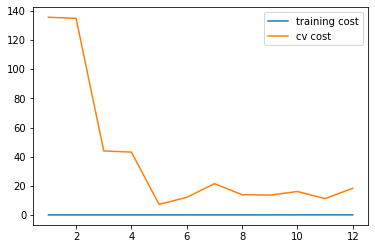

In [21]:
def plotPolyLearningCurve(X, y, Xval, yval, lam=0.):
    tr_cost, cv_cost = [], []
    m = [i for i in range(1, X.shape[0] + 1)]
    theta = np.random.rand(X.shape[1])
    for i in m:
        fmin = train(theta, X[:i], y[:i], lam)
        tr_cost.append(cost(fmin.x, X[:i], y[:i]))
        cv_cost.append(cost(fmin.x, Xval, yval))
    plt.plot(m, tr_cost, label='training cost')
    plt.plot(m, cv_cost, label='cv cost')
    plt.legend(loc=1)
    plt.show()
plotPolyLearningCurve(X, y, Xval, yval)

tr_cost too low, over fitting

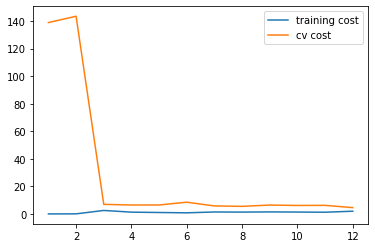

In [22]:
plotPolyLearningCurve(X, y, Xval, yval, 1)

ighten the fitting

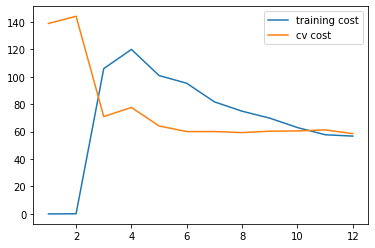

In [23]:
plotPolyLearningCurve(X, y, Xval, yval, 100)

less fitting

## 9 Find the best lam

1


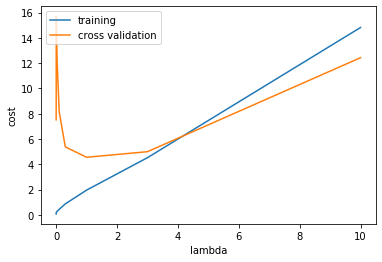

In [24]:
def showCost(X, y, Xval, yval, lam_vals):
    tr_cost, cv_cost = [], []
    theta = np.random.rand(X.shape[1])
    for lam in lam_vals:
        fmin = train(theta, X, y, lam)
        tr_cost.append(cost(fmin.x, X, y))
        cv_cost.append(cost(fmin.x, Xval, yval))
    print(lam_vals[np.argmin(cv_cost)])
    plt.plot(lam_vals, tr_cost, label='training')
    plt.plot(lam_vals, cv_cost, label='cross validation')
    plt.legend(loc=2)
    plt.xlabel('lambda')
    plt.ylabel('cost')
    plt.show()

lam_vals = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
showCost(X, y, Xval, yval, lam_vals)

In [30]:
for lam in lam_vals:
    theta = np.random.rand(X.shape[1])
    fmin = train(theta, X, y, lam)
    J = cost(fmin.x, Xtest, ytest)
    print(f'test cost lam={lam} cost={J}')


test cost lam=0 cost=9.919069789169734
test cost lam=0.001 cost=11.107633166069158
test cost lam=0.003 cost=11.323753082506807
test cost lam=0.01 cost=10.987527394607609
test cost lam=0.03 cost=10.219042061768796
test cost lam=0.1 cost=8.954134880073111
test cost lam=0.3 cost=7.745217894983004
test cost lam=1 cost=7.85155092851503
test cost lam=3 cost=11.770321197017605
test cost lam=10 cost=26.894046564834927


In [ ]:
in